In [1]:
cd Downloads


C:\Users\chidimmpe\Downloads


https://data.europa.eu/data/datasets/s2190_90_1_478_eng?locale=en

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
EU_antibiotics = pd.ExcelFile("EU_antibiotics_country.xls")
print(EU_antibiotics.sheet_names)

['Index', 'B2', 'Q1NAT', 'QC1', 'QC2', 'QC3', 'QC4', 'QC5.1', 'QC5.2', 'QC5.3', 'QC5.4', 'QC5.5', 'QC5R', 'QC6', 'QC7', 'QC8', 'QC9', 'QC10', 'QC11', 'QC12', 'QC13', 'QC14', 'QC15', 'D1.1', 'D1.2', 'D1.3', 'D7.1', 'D7.2', 'D7.3', 'D8', 'D10', 'D11', 'D112', 'D15a.1', 'D15a.2', 'C14', 'D15b.1', 'D15b.2', 'D25', 'D40a', 'D40b', 'D40c', 'D40R', 'D40', 'D43a', 'D43b', 'D43', 'D60', 'D62.1', 'D62.2', 'D62.3', 'D62.4', 'D62R', 'D63', 'D70', 'D79', 'D71.1', 'D71.2', 'D71.3', 'C1', 'C2', 'D72.1', 'D72.2', 'D72.3', 'D73.1', 'D73.2', 'D77', 'D78', 'D80a', 'D80b', 'D81', 'D82', 'D83']


In [4]:
df= pd.read_excel(EU_antibiotics, "Index")
df.head(10)


,B2'!A1,B Pays,Unnamed: 2,Unnamed: 3,B Country,Unnamed: 5,Unnamed: 6
0,Q1NAT'!A1,Q1NAT Quelle est votre nationalité ? Veuillez ...,NaN,NaN,Q1NAT What is your nationality? Please tell me...,NaN,NaN
1,QC1'!A1,QC1 Avez-vous pris des antibiotiques par voie ...,NaN,('QUESTION SENSIBLE'),QC1 Have you taken any antibiotics orally such...,NaN,('SENSITIVE QUESTION')
2,QC2'!A1,QC2 Comment avez-vous obtenu le dernier traite...,NaN,"(SI 'OUI', CODE 1 EN QC1)",QC2 How did you obtain the last course of anti...,NaN,"(IF 'YES', CODE 1 IN QC1)"
3,QC3'!A1,QC3 Quelle était la raison pour laquelle vous ...,NaN,"(SI 'OUI', CODE 1 EN QC1)",QC3 What was the reason for last taking the an...,NaN,"(IF 'YES', CODE 1 IN QC1)"
4,QC4'!A1,"QC4 Avez-vous fait un examen, tel qu'une prise...",NaN,"(SI 'OUI', CODE 1 EN QC1)","QC4 Did you have a test, for example a blood o...",NaN,"(IF 'YES', CODE 1 IN QC1)"
5,QC5.1'!A1,"QC5.1 Pour chacune des propositions suivantes,...",Les antibiotiques tuent les virus,NaN,"QC5.1 For each of the following statements, pl...",Antibiotics kill viruses,NaN
6,QC5.2'!A1,"QC5.2 Pour chacune des propositions suivantes,...",Les antibiotiques sont efficaces contre le rhume,NaN,"QC5.2 For each of the following statements, pl...",Antibiotics are effective against colds,NaN
7,QC5.3'!A1,"QC5.3 Pour chacune des propositions suivantes,...",La prise inutile d’antibiotiques les rend inef...,NaN,"QC5.3 For each of the following statements, pl...",Unnecessary use of antibiotics makes them beco...,NaN
8,QC5.4'!A1,"QC5.4 Pour chacune des propositions suivantes,...",La prise d’antibiotiques a souvent des effets ...,NaN,"QC5.4 For each of the following statements, pl...",Taking antibiotics often has side-effects such...,NaN
9,QC5.5'!A1,"QC5.5 Pour chacune des propositions suivantes,...",Moyenne,NaN,"QC5.5 For each of the following statements, pl...",Average,NaN


Index lists the titles of the sheets and the issues they address

In [5]:
list(df["B Country"])

['Q1NAT What is your nationality? Please tell me the country(ies) that applies(y). MULTIPLE ANSWERS POSSIBLE',
 'QC1 Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months? ',
 'QC2 How did you obtain the last course of antibiotics that you used? ',
 'QC3 What was the reason for last taking the antibiotics that you used? (MULTIPLE ANSWERS POSSIBLE)',
 'QC4 Did you have a test, for example a blood or urine test, or throat swab, to find out what was causing your illness, before or at the same time as you started antibiotics ? ',
 'QC5.1 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.2 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.3 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.4 For each of the following statements, please tell me whether you think it is true or false. ',
 'QC5.5 For each 

I will basically limit this analyses to the sheets that adress questions related to antibiotics resistance and its awareness  level in the EU countries

The sheet that deals with nationality will be assigned as "nationality" This gives the information about the countries on the vertical axis and their abbreviations on the horizontal axis. I will be using this information to rename the abbreviations to the countries' full names

In [6]:
Nationality= pd.read_excel(EU_antibiotics, "B2", skiprows = 7, header = [1])
#Drop the "UE28\nEU28" as it is not relevant to this analyses. It specifies the percentage of  respondents in the EU sample
Nationality= Nationality.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Nationality.rename(columns ={"Unnamed: 1":"Country"}, inplace = True)

Nationality.head(70)

,Country,BE,BG,CZ,DK,D-W,DE,D-E,EE,IE,...,NL,AT,PL,PT,RO,SI,SK,FI,SE,UK
0,TOTAL,1018,1040,1012,1015,1006,1507,501,1017,1001,...,1044,1007,1034,1016,1007,1018,1042,1011,1011,1000
1,BELGIQUE,1018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,DANMARK,0,0,0,1015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,-,-,-,1,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,1,-,-,-,-
57,TURKIYE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,NaN,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
59,HRVATSKA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Nationality.dropna()

,Country,BE,BG,CZ,DK,D-W,DE,D-E,EE,IE,...,NL,AT,PL,PT,RO,SI,SK,FI,SE,UK
0,TOTAL,1018,1040,1012,1015,1006,1507,501,1017,1001,...,1044,1007,1034,1016,1007,1018,1042,1011,1011,1000
1,BELGIQUE,1018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DANMARK,0,0,0,1015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ELLADA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ESPANA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,SUOMI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1011,0,0
11,FRANCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,IRELAND,0,0,0,0,0,0,0,0,1001,...,0,0,0,0,0,0,0,0,0,0
15,ITALIA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,LUXEMBOURG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
for col in Nationality:
    print(col)

Country
BE
BG
CZ
DK
D-W
DE
D-E
EE
IE
EL
ES
FR
HR
IT
CY
LV
LT
LU
HU
MT
NL
AT
PL
PT
RO
SI
SK
FI
SE
UK


https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes. I will use the details here to edit the country names in the dataframes

For each dataset, the responses were recorded in English and in French. While the French version contained the number of respondents , the English version contained the percentage of respondents. I will be using English, with the number of respondents

# Question 1 (QC1): Have you taken any antibiotics orally such as tablets, powder or syrup in the last 12 months? 								

In [9]:
Question_1= pd.read_excel(EU_antibiotics, "QC1", skiprows = 7, header = [1])
Question_1= Question_1.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_1.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_1 = Question_1.set_index("Response")
Question_1 =Question_1.loc[["Oui", "Non", "Refus (SPONTANÉ)", "NSP"]]
Question_1= Question_1.rename(index= {"Oui":"Yes", "Non":"No", "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know"})
Question_1.reset_index(drop = True)
Question_1.head()

,Belgium,Bulgaria,Czech Republic,Denmark,West Germany,East Germany,Eastern Germany,Estonia,Ireland,Greece,...,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom
Response,,,,,,,,,,,,,,,,,,,,,
Yes,320,348,250,271,213.0,332,127,310,389,309,...,222,288,233,317,280,234,335,254,200,288
No,639,659,642,701,739.0,1102,359,646,576,677,...,809,641,716,668,696,758,630,729,807,637
Refusal,1,0,1,1,5.0,7,1,0,2,0,...,1,6,3,1,1,0,0,2,0,2
I dont know,0,12,8,5,9.0,13,2,4,1,0,...,7,1,5,4,6,1,15,7,3,4


To check if the countrynames reflected as desired

In [10]:
for col in Question_1:
    print (col)

Belgium
Bulgaria
Czech Republic
Denmark
West Germany
East Germany
Eastern Germany
Estonia
Ireland
Greece
Spain
France
Croatia
Italy
Cyprus
Latvia
Lithuania
Luxembourg
Hungary
Malta
Netherlands
Austria
Poland
Portugal
Romania
Slovenia
Slovekia
Finland
Sweden
United Kingdom


However, three columns "West Germany", "East Germany", and "Eastern Germany" all belong to the same country and would thus be merged into one column in all the data sets. 

In [11]:
Question_1["Germany"]=Question_1["West Germany"] + Question_1["East Germany"] + Question_1["Eastern Germany"]
Question_1.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
Yes,320,348,250,271,310,389,309,397,355,362,...,288,233,317,280,234,335,254,200,288,672.0
No,639,659,642,701,646,576,677,552,601,675,...,641,716,668,696,758,630,729,807,637,2200.0
Refusal,1,0,1,1,0,2,0,0,1,0,...,6,3,1,1,0,0,2,0,2,13.0
I dont know,0,12,8,5,4,1,0,5,9,4,...,1,5,4,6,1,15,7,3,4,24.0


# Question 2 (QC2): How did you obtain the last course of antibiotics that you used? 									


In [12]:
Question_2= pd.read_excel(EU_antibiotics, "QC2", skiprows = 7, header = [1])
Question_2= Question_2.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_2.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_2 = Question_2.set_index("Response")
Question_2 =Question_2.loc[["Sur prescription médicale", "Administré par une personne du corps médical", "Il vous en restait d’un précédent traitement",
"Sans prescription, dans une pharmacie", "Sans prescription, ailleurs", "Ne se souvient pas (SPONTANÉ)",
"Refus (SPONTANÉ)", "NSP", "Total 'De la part dune personne du corps medical'"]]
Question_2= Question_2.rename(index= { "Sur prescription médicale":"From a medical prescription",
                                      "Administré par une personne du corps médical":"Administered by a medical practitioner",
                                      "Il vous en restait d’un précédent traitement":"You had some left over from a previous course",
                                      "Sans prescription, dans une pharmacie":"Without prescription from a pharmacy",
                                      "Sans prescription, ailleurs":"Without prescription from elsewhere",
                                     "Ne se souvient pas (SPONTANÉ)":"Don't remember (SPONTANEOUS)", "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know",
                                                "Total 'De la part dune personne du corps medical'":"Total 'From a medical practitioner '"})
Question_2.reset_index(drop = True)
Question_2["Germany"]=Question_2["West Germany"] + Question_2["East Germany"] + Question_2["Eastern Germany"]
Question_2=Question_2.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_2.head(10)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
From a medical prescription,236,95,183,167,187,215,160,322,297,296,...,216,178,224,150,191,264,208,111,190,565
Administered by a medical practitioner,40,204,58,86,99,142,122,55,42,33,...,26,45,60,86,29,29,39,85,87,75
You had some left over from a previous course,20,21,3,1,7,5,6,7,8,14,...,23,4,18,13,10,8,4,1,1,2
Without prescription from a pharmacy,21,26,3,10,13,19,20,12,7,16,...,17,6,13,23,5,33,3,4,7,25
Without prescription from elsewhere,2,0,3,6,1,8,2,1,1,2,...,2,0,1,6,0,1,0,0,1,6
Don't remember (SPONTANEOUS),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Refusal,1,1,0,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
I dont know,0,1,0,1,0,0,0,0,0,0,...,1,0,0,2,0,0,1,0,1,0
Total 'From a medical practitioner ',277,299,241,253,286,357,282,377,339,329,...,243,222,284,236,220,293,247,196,277,640


# QC3: What was the reason for last taking the antibiotics that you used? (MULTIPLE ANSWERS POSSIBLE)									


In [13]:
Question_3= pd.read_excel(EU_antibiotics, "QC3", skiprows = 7, header = [1])
Question_3= Question_3.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_3.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_3 = Question_3.set_index("Response")
Question_3 =Question_3.loc[["Une pneumonie (une infection qui cause une inflammation d’un ou des deux poumons)", 
                            "Une bronchite (une inflammation et un encombrement des bronches, les voies respiratoires qui acheminent le flux d’air de la trachée dans les poumons)", 
                            "Une rhinopharyngite (une inflammation de la muqueuse du nez et du pharynx)", 
                            "La grippe", "Un rhume", "Un mal de gorge", "De la toux", "De la fièvre", "Un mal de tête",
                            "De la diarrhée", "Une infection urinaire", "Une infection de la peau ou d’une blessure",
                            "Autre (SPONTANÉ)", "Ne souhaite pas répondre (SPONTANÉ)", "Refus (SPONTANÉ) (N)", "NSP",
                            "Maladie seulement", "Symptôme seulement", "Maladie et symptôme"
                           ]]
Question_3= Question_3.rename(index= {"Une pneumonie (une infection qui cause une inflammation d’un ou des deux poumons)": "Pneumonia (an infection causing an inflammation of one or both lungs)", 
                            "Une bronchite (une inflammation et un encombrement des bronches, les voies respiratoires qui acheminent le flux d’air de la trachée dans les poumons)":"Bronchitis (inflammation and swelling of the bronchi, the airways that carry airflow from the trachea into the lungs)", 
                            "Une rhinopharyngite (une inflammation de la muqueuse du nez et du pharynx)": "Rhinopharyngitis (inflammation of the mucous membrane of the nose and pharynx)", 
                            "La grippe": "Flu", "Un rhume":"Cold", "Un mal de gorge":"Sore throat", "De la toux":"Cough", "De la fièvre":"Fever", 
                            "Un mal de tête":"Headache", "De la diarrhée": "Diarrhea", "Une infection urinaire":"Urinary tract infection",
                            "Une infection de la peau ou d’une blessure":"Skin or wound infection", "Autre (SPONTANÉ)": "Others",
                            "Ne souhaite pas répondre (SPONTANÉ)": "Do not wish to answer", "Refus (SPONTANÉ) (N)":"Refusal", "NSP":"I dont know",
                            "Maladie seulement":"Illness only", "Symptôme seulement":"Symptom only", "Maladie et symptôme":"Ilness and symptom"})
Question_3.reset_index(drop = True)
Question_3["Germany"]=Question_3["West Germany"] + Question_3["East Germany"] + Question_3["Eastern Germany"]
Question_3=Question_3.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_3.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
Pneumonia (an infection causing an inflammation of one or both lungs),24,25,13.0,40,18.0,17.0,22,11.0,11.0,19,...,31,14.0,16,19.0,22.0,13.0,19.0,20,16.0,23.0
"Bronchitis (inflammation and swelling of the bronchi, the airways that carry airflow from the trachea into the lungs)",48,83,67.0,14,34.0,62.0,37,33.0,65.0,44,...,64,50.0,26,36.0,20.0,81.0,32.0,5,28.0,74.0
Rhinopharyngitis (inflammation of the mucous membrane of the nose and pharynx),38,16,17.0,40,22.0,15.0,41,29.0,36.0,11,...,26,20.0,27,15.0,10.0,21.0,40.0,24,12.0,12.0
Flu,60,73,27.0,21,22.0,54.0,51,41.0,41.0,29,...,44,26.0,39,32.0,16.0,65.0,20.0,7,24.0,98.0
Cold,46,45,10.0,6,38.0,37.0,52,39.0,11.0,40,...,28,37.0,24,66.0,22.0,26.0,2.0,7,17.0,94.0
Sore throat,47,75,42.0,23,29.0,60.0,37,74.0,28.0,87,...,30,40.0,35,23.0,40.0,80.0,11.0,7,39.0,47.0
Cough,40,72,13.0,9,24.0,26.0,32,13.0,11.0,28,...,16,22.0,13,29.0,18.0,59.0,6.0,4,21.0,54.0
Fever,39,82,25.0,13,9.0,31.0,71,39.0,19.0,15,...,24,28.0,23,26.0,25.0,80.0,7.0,13,10.0,59.0
Headache,37,32,6.0,3,20.0,8.0,10,13.0,19.0,26,...,10,13.0,14,31.0,10.0,42.0,1.0,2,12.0,17.0


# QC4: Did you have a test, for example a blood or urine test, or throat swab, to find out what was causing your illness, before or at the same time as you started antibiotics ? 									


In [14]:
Question_4= pd.read_excel(EU_antibiotics, "QC4", skiprows = 7, header = [1])
Question_4= Question_4.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_4.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_4 = Question_4.set_index("Response")
Question_4 =Question_4.loc[[ "Oui", "Non", "Ne se souvient pas (SPONTANÉ)", 
                            "Ne souhaite pas répondre (SPONTANÉ)", "Refus (SPONTANÉ)", "NSP"]]
Question_4= Question_4.rename(index= {"Oui":"Yes", "Non":"No", "Ne se souvient pas (SPONTANÉ)":"Don't remember (SPONTANEOUS)", 
                                     "Ne souhaite pas répondre (SPONTANÉ)":"Do not wish to answer (SPONTANEOUS)",
                                      "Refus (SPONTANÉ)": "Refusal", "NSP": "I dont know"})
Question_4.reset_index(drop = True)
Question_4["Germany"]=Question_4["West Germany"] + Question_4["East Germany"] + Question_4["Eastern Germany"]
Question_4=Question_4.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_4.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
Yes,166,153,181,148,212,160,126,148,156,228,...,143,92,119,111,164,142,144,121,125,238
No,150,182,60,121,92,221,181,246,198,128,...,122,137,195,158,65,184,108,77,158,388
Don't remember (SPONTANEOUS),0,9,7,0,1,4,0,2,0,2,...,10,1,1,3,4,2,0,2,3,34
Do not wish to answer (SPONTANEOUS),4,2,0,0,2,1,2,1,1,2,...,10,2,0,5,0,2,0,0,0,4
Refusal,0,1,0,1,1,2,0,0,0,2,...,0,0,0,0,1,2,0,0,0,0
I dont know,1,1,2,1,3,1,0,0,0,0,...,2,1,2,3,0,2,2,0,2,10


# For each of the following statements, please tell me whether you think it is true or false. QC5.1: Antibiotics kill viruses									
								


In [15]:
Question_5_1= pd.read_excel(EU_antibiotics, "QC5.1", skiprows = 7, header = [1])
Question_5_1= Question_5_1.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_5_1.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_5_1 = Question_5_1.set_index("Response")
Question_5_1 =Question_5_1.loc[["Vraie", "Fausse", "NSP"]]
Question_5_1= Question_5_1.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_1.reset_index(drop = True)
Question_5_1["Germany"]=Question_5_1["West Germany"] + Question_5_1["East Germany"] + Question_5_1["Eastern Germany"]
Question_5_1=Question_5_1.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_5_1.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
True,468.0,582.0,590.0,406.0,506.0,483.0,717.0,501.0,362.0,547.0,...,681.0,489.0,645.0,566.0,537.0,577.0,367.0,226.0,410.0,1330.0
False,518.0,278.0,345.0,521.0,369.0,463.0,239.0,381.0,545.0,464.0,...,284.0,412.0,289.0,367.0,400.0,406.0,563.0,746.0,485.0,1401.0
I dont know,33.0,179.0,78.0,88.0,142.0,55.0,59.0,127.0,120.0,39.0,...,42.0,133.0,82.0,74.0,81.0,59.0,81.0,40.0,104.0,284.0


# QC5.2: Antibiotics are effective against colds

In [16]:
Question_5_2= pd.read_excel(EU_antibiotics, "QC5.2", skiprows = 7, header = [1])
Question_5_2= Question_5_2.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_5_2.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_5_2 = Question_5_2.set_index("Response")
Question_5_2 =Question_5_2.loc[[ "Vraie", "Fausse", "NSP"]]
Question_5_2= Question_5_2.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_2.reset_index(drop = True)
Question_5_2["Germany"]=Question_5_2["West Germany"] + Question_5_2["East Germany"] + Question_5_2["Eastern Germany"]
Question_5_2=Question_5_2.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_5_2.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
True,178.0,459.0,249.0,102.0,265.0,241.0,571.0,365.0,162.0,488.0,...,428.0,445.0,554.0,504.0,312.0,401.0,109.0,114.0,163.0,837.0
False,825.0,424.0,704.0,815.0,611.0,698.0,397.0,577.0,797.0,521.0,...,524.0,503.0,381.0,446.0,619.0,600.0,853.0,862.0,778.0,2032.0
I dont know,15.0,157.0,59.0,98.0,141.0,61.0,47.0,67.0,67.0,41.0,...,55.0,86.0,81.0,57.0,87.0,41.0,49.0,35.0,59.0,145.0


# QC5.3: Unnecessary use of antibiotics makes them become ineffective

In [17]:
Question_5_3= pd.read_excel(EU_antibiotics, "QC5.3", skiprows = 7, header = [1])
Question_5_3= Question_5_3.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_5_3.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_5_3 = Question_5_3.set_index("Response")
Question_5_3 =Question_5_3.loc[[ "Vraie", "Fausse", "NSP"]]
Question_5_3= Question_5_3.rename(index= {"Vraie":"True", "Fausse":"False", "NSP":"I dont know"})
Question_5_3.reset_index(drop = True)
Question_5_3["Germany"]=Question_5_3["West Germany"] + Question_5_3["East Germany"] + Question_5_3["Eastern Germany"]
Question_5_3=Question_5_3.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_5_3.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
True,861.0,806.0,883.0,949.0,835.0,888.0,983.0,868.0,856.0,858.0,...,801.0,886.0,870.0,740.0,921.0,948.0,945.0,971.0,900.0,2732.0
False,134.0,90.0,74.0,22.0,76.0,73.0,8.0,81.0,103.0,148.0,...,144.0,102.0,80.0,195.0,60.0,64.0,42.0,19.0,52.0,175.0
I dont know,23.0,144.0,54.0,44.0,106.0,40.0,24.0,59.0,68.0,44.0,...,62.0,46.0,66.0,72.0,37.0,29.0,23.0,20.0,48.0,107.0


# QC6 When do you think you should stop taking antibiotics once you have begun a course of treatment?

In [18]:
Question_6= pd.read_excel(EU_antibiotics, "QC6", skiprows = 7, header = [1])
Question_6= Question_6.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_6.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_6 = Question_6.set_index("Response")
Question_6 =Question_6.loc[["Quand vous vous sentez mieux", 
                            "Quand vous avez pris tous les antibiotiques tel que prescrit par votre médecin",
                            "Autre (SPONTANÉ)", "NSP"]]
Question_6= Question_6.rename(index= {"Quand vous vous sentez mieux":"When you feel better", 
                                      "Quand vous avez pris tous les antibiotiques tel que prescrit par votre médecin":"When you have taken all of the antibiotics as directed by your doctor", 
                                      "Autre (SPONTANÉ)": "Others", "NSP":"I dont know"})

Question_6["Germany"]=Question_6["West Germany"] + Question_6["East Germany"] + Question_6["Eastern Germany"]
Question_6=Question_6.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_6.reset_index()
Question_6.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
When you feel better,173,219.0,85,96.0,107,136,147,131.0,169,210,...,167.0,176.0,132,200,122.0,207,63.0,37,89,252.0
When you have taken all of the antibiotics as directed by your doctor,837,732.0,923,883.0,859,848,860,851.0,837,827,...,803.0,817.0,870,781,869.0,801,930.0,964,901,2632.0
Others,1,16.0,2,13.0,2,2,5,20.0,2,2,...,11.0,7.0,1,5,8.0,1,5.0,1,2,36.0
I dont know,8,73.0,3,23.0,49,15,4,7.0,19,11,...,26.0,34.0,13,21,18.0,33,12.0,9,8,94.0


# QC8 Where did you get this information about not taking antibiotics unnecessarily? (MULTIPLE ANSWERS POSSIBLE)

In [19]:
Question_8= pd.read_excel(EU_antibiotics, "QC8", skiprows = 7, header = [1])
Question_8= Question_8.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_8.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_8 = Question_8.set_index("Response")
Question_8 =Question_8.loc[[ "Un médecin vous en a parlé", "Un pharmacien vous en a parlé",
                            "Un autre professionnel de la santé (p. ex., une infirmière, un kinésithérapeute) vous en a parlé",
                            "Un membre de votre famille ou un ami vous en a parlé", "Vous l'avez vue dans une publicité à la télévision",
                            "Vous l'avez vue sur Internet ou les réseaux sociaux en ligne","Vous l'avez vue dans une brochure ou sur une affiche",
                            "Vous l'avez lue dans un journal", "Vous l'avez vue au journal télévisé ou dans un autre programme", 
                            "Vous l'avez entendue à la radio", 
                            "Autre (SPONTANÉ)", "NSP", "Professionnel ou établissement de santé"]]
Question_8= Question_8.rename(index= { "Un médecin vous en a parlé":"From a doctor",
                                      "Un pharmacien vous en a parlé":"From a doctor",
                            "Un autre professionnel de la santé (p. ex., une infirmière, un kinésithérapeute) vous en a parlé":"From another health professional (e.g. nurse or physio-therapist)",
                            "Un membre de votre famille ou un ami vous en a parlé":"From a family member or friend",
                            "Vous l'avez vue dans une publicité à la télévision": "From a TV advertisement",
                            "Vous l'avez vue sur Internet ou les réseaux sociaux en ligne": "On the Internet or in online social networks",
                            "Vous l'avez vue dans une brochure ou sur une affiche": "In a leaflet or on a poster",
                            "Vous l'avez lue dans un journal":"In a newspaper",
                            "Vous l'avez vue au journal télévisé ou dans un autre programme":"On the TV news or other programmes", 
                            "Vous l'avez entendue à la radio":"On the radio", 
                            "Autre (SPONTANÉ)": "Other", "NSP": "I don't know",
                            "Professionnel ou établissement de santé": "Professional or health care facility"})
Question_8.reset_index(drop = True)
Question_8["Germany"]=Question_8["West Germany"] + Question_8["East Germany"] + Question_8["Eastern Germany"]
Question_8=Question_8.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_8.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
From a doctor,207,95.0,180.0,120.0,210.0,95,118,105.0,155.0,131.0,...,144.0,138.0,72.0,75.0,160,146,235.0,135.0,164.0,429.0
From a doctor,96,35.0,59.0,41.0,58.0,54,40,20.0,46.0,42.0,...,63.0,42.0,29.0,40.0,60,59,69.0,41.0,50.0,177.0
From another health professional (e.g. nurse or physio-therapist),24,19.0,30.0,38.0,37.0,17,8,28.0,20.0,21.0,...,32.0,16.0,4.0,11.0,35,31,83.0,77.0,36.0,106.0
From a family member or friend,47,38.0,55.0,38.0,67.0,18,41,28.0,33.0,42.0,...,68.0,43.0,22.0,22.0,77,62,131.0,104.0,22.0,157.0
From a TV advertisement,172,36.0,41.0,22.0,33.0,43,81,35.0,238.0,19.0,...,53.0,57.0,25.0,27.0,37,24,23.0,39.0,152.0,104.0
On the Internet or in online social networks,51,17.0,29.0,47.0,92.0,17,42,32.0,33.0,25.0,...,38.0,53.0,12.0,13.0,50,56,169.0,104.0,54.0,303.0
In a leaflet or on a poster,73,14.0,17.0,25.0,32.0,20,19,10.0,38.0,11.0,...,42.0,31.0,14.0,4.0,41,35,58.0,47.0,70.0,155.0
In a newspaper,70,11.0,19.0,36.0,57.0,21,11,12.0,34.0,10.0,...,157.0,25.0,10.0,4.0,37,31,226.0,165.0,83.0,512.0
On the TV news or other programmes,101,52.0,53.0,79.0,64.0,33,70,68.0,108.0,16.0,...,123.0,78.0,145.0,11.0,55,83,218.0,210.0,110.0,475.0


# QC12 Which of the following sources of information would you use in order to get trustworthy information on antibiotics? (MAX. 3 ANSWERS)

In [20]:
Question_12= pd.read_excel(EU_antibiotics, "QC12", skiprows = 7, header = [1])
Question_12= Question_12.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_12.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_12 = Question_12.set_index("Response")
Question_12 =Question_12.loc[["Un médecin", "Un(e) infirmier/infirmière", "Une pharmacie", "Un hôpital",
                             "Un autre établissement de santé", "La famille ou des amis", 
                             "Un site Internet officiel lié à la santé (par ex. site du Gouvernement national/ de l’institut national de santé publique/ de l’Union européenne)",
                             "Un blog personnel lié à la santé", "Un réseau social en ligne" ,"La télévision", 
                             "Un journal ou un magazine", "La radio", "Autre (SPONTANÉ)",
                             "Vous ne recherchez pas d'informations sur les antibiotiques (SPONTANÉ)", "NSP"]]
Question_12= Question_12.rename(index= {"Un médecin":"A doctor", "Un(e) infirmier/infirmière":"A nurse", "Une pharmacie": "A pharmacy", "Un hôpital": "A hospital",
                             "Un autre établissement de santé": "Another health care facility", "La famille ou des amis": "Family or friends", 
                             "Un site Internet officiel lié à la santé (par ex. site du Gouvernement national/ de l’institut national de santé publique/ de l’Union européenne)": "An official health-related website (e.g. a website set up by the national government/ public health body/ European Union)",
                             "Un blog personnel lié à la santé" : "A health-related personal blog", "Un réseau social en ligne":"Online social networks" ,"La télévision": "TV", 
                             "Un journal ou un magazine":"Newspapers or magazines", "La radio":"Radio", "Autre (SPONTANÉ)":"Others",
                             "Vous ne recherchez pas d'informations sur les antibiotiques (SPONTANÉ)":"You are not interested in finding information on antibiotics (SPONTANEOUS)", "NSP":"I don't know"})
Question_12.reset_index(drop = True)
Question_12["Germany"]=Question_12["West Germany"] + Question_12["East Germany"] + Question_12["Eastern Germany"]
Question_12=Question_12.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_12.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
A doctor,898,834.0,868.0,890.0,879.0,841.0,950.0,914.0,907.0,926,...,839.0,841.0,871.0,753.0,850.0,846.0,801.0,725.0,902.0,2655.0
A nurse,167,99.0,147.0,191.0,224.0,242.0,26.0,160.0,140.0,143,...,115.0,135.0,191.0,175.0,154.0,201.0,200.0,305.0,300.0,168.0
A pharmacy,472,291.0,464.0,436.0,362.0,521.0,353.0,305.0,472.0,443,...,503.0,257.0,482.0,313.0,476.0,466.0,599.0,486.0,579.0,1352.0
A hospital,206,164.0,268.0,283.0,118.0,216.0,456.0,233.0,247.0,174,...,269.0,133.0,238.0,193.0,142.0,175.0,172.0,178.0,340.0,233.0
Another health care facility,28,39.0,61.0,30.0,31.0,64.0,106.0,93.0,42.0,66,...,82.0,38.0,78.0,46.0,23.0,25.0,47.0,67.0,35.0,154.0
Family or friends,42,88.0,53.0,35.0,58.0,43.0,48.0,24.0,36.0,62,...,88.0,44.0,24.0,73.0,100.0,74.0,53.0,52.0,33.0,167.0
An official health-related website (e.g. a website set up by the national government/ public health body/ European Union),107,125.0,117.0,350.0,139.0,109.0,170.0,62.0,132.0,65,...,112.0,131.0,60.0,43.0,100.0,79.0,341.0,499.0,153.0,357.0
A health-related personal blog,11,38.0,19.0,12.0,6.0,16.0,8.0,6.0,6.0,19,...,27.0,17.0,19.0,17.0,13.0,21.0,13.0,4.0,14.0,13.0
Online social networks,17,29.0,21.0,30.0,39.0,35.0,25.0,11.0,3.0,14,...,46.0,20.0,10.0,13.0,17.0,36.0,28.0,28.0,13.0,134.0


# QC15 Did you know that using antibiotics to stimulate growth in farm animals is banned within the EU? 									


In [21]:
Question_15= pd.read_excel(EU_antibiotics, "QC15", skiprows = 7, header = [1])
Question_15= Question_15.drop(["UE28\nEU28", "Unnamed: 0"], axis = 1)
Question_15.rename(columns ={"Unnamed: 1":"Response", "BE": "Belgium", "BG": "Bulgaria", "CZ": "Czech Republic", 
                          "DK": "Denmark", "D-W": "West Germany", "DE": "East Germany", "D-E": "Eastern Germany", "EE": "Estonia", 
                           "IE": "Ireland", "EL" :"Greece" , "ES":"Spain", "FR":"France", "HR":"Croatia", "IT":"Italy","CY":"Cyprus",
                           "LV":"Latvia", "LT": "Lithuania", "LU": "Luxembourg", "HU":"Hungary", "MT":"Malta", "NL":"Netherlands", 
                            "AT":"Austria", "PL": "Poland", "PT":"Portugal", "RO": "Romania", "SI":"Slovenia", "SK":"Slovekia",
                          "FI":"Finland", "SE": "Sweden", "UK":"United Kingdom" }, inplace = True)
Question_15 = Question_15.set_index("Response")
Question_15 =Question_15.loc[["Oui", "Non", "NSP"]]
Question_15= Question_15.rename(index= {"Oui":"Yes", "Non":"No", "NSP":"I dont know"})
Question_15.reset_index(drop = True)
Question_15["Germany"]=Question_15["West Germany"] + Question_15["East Germany"] + Question_15["Eastern Germany"]
Question_15=Question_15.drop(["West Germany", "East Germany", "Eastern Germany"], axis = 1)
Question_15.head(20)

,Belgium,Bulgaria,Czech Republic,Denmark,Estonia,Ireland,Greece,Spain,France,Croatia,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
Response,,,,,,,,,,,,,,,,,,,,,
Yes,447.0,341.0,385.0,336.0,274.0,419.0,252.0,323.0,400.0,314.0,...,408.0,449.0,330.0,212.0,407.0,412.0,464.0,372.0,287.0,1102.0
No,563.0,593.0,597.0,637.0,698.0,551.0,733.0,664.0,612.0,716.0,...,557.0,517.0,652.0,737.0,554.0,558.0,532.0,623.0,685.0,1788.0
I dont know,9.0,106.0,31.0,43.0,45.0,32.0,30.0,22.0,15.0,20.0,...,42.0,68.0,35.0,58.0,57.0,72.0,15.0,16.0,28.0,125.0


# Visualization of the awareness level of antibbiotics resistance in the European Union

Checking the data for missing values that could significantly affect the visualization

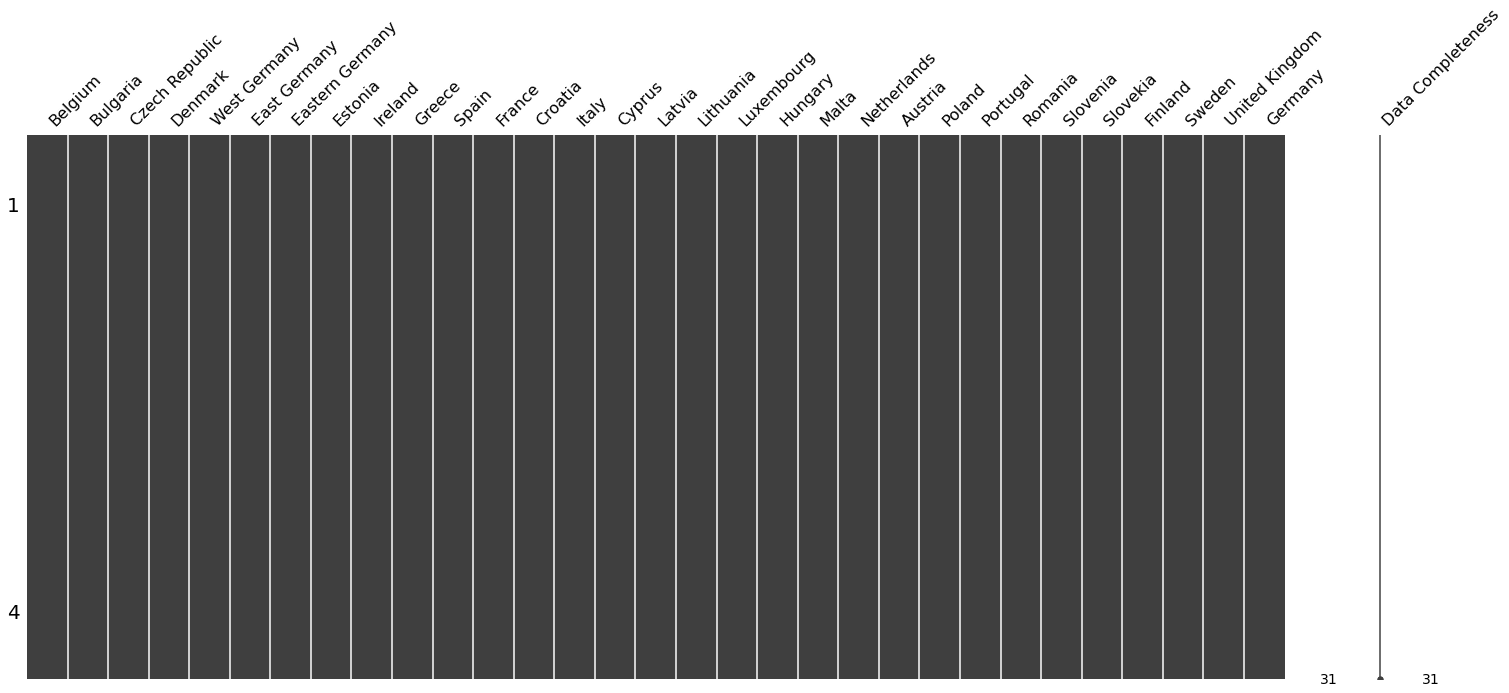

In [22]:
msno.matrix(Question_1, labels=True, sort = "ascending");

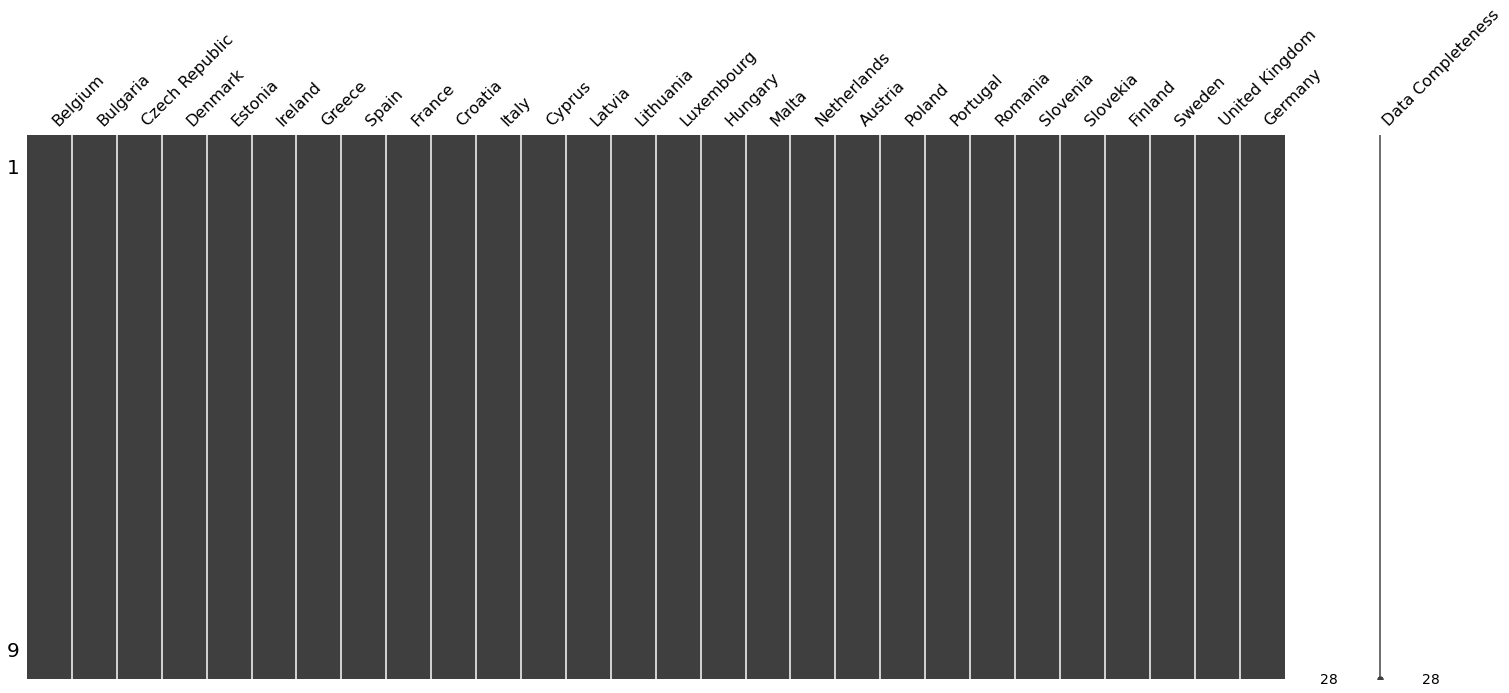

In [23]:
msno.matrix(Question_2, labels=True, sort = "ascending");

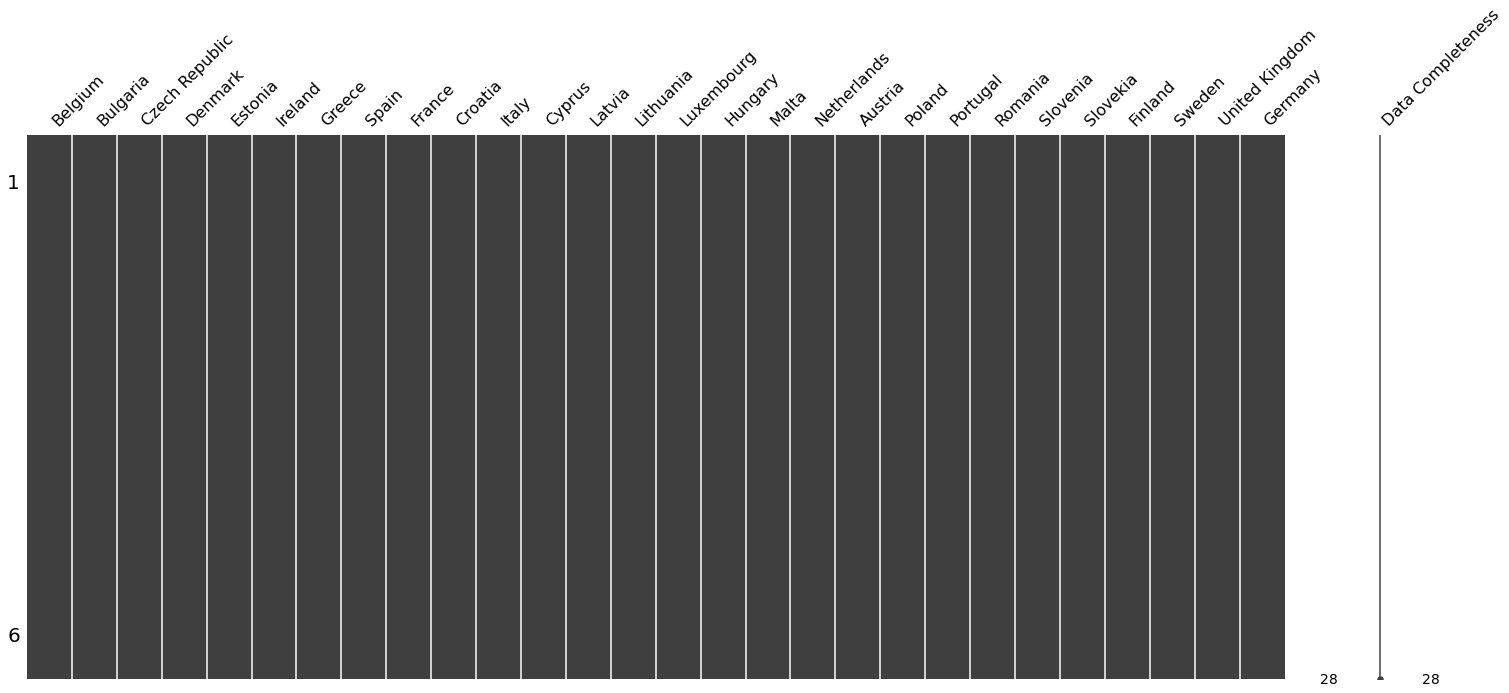

In [24]:
msno.matrix(Question_4, labels=True, sort = "ascending");

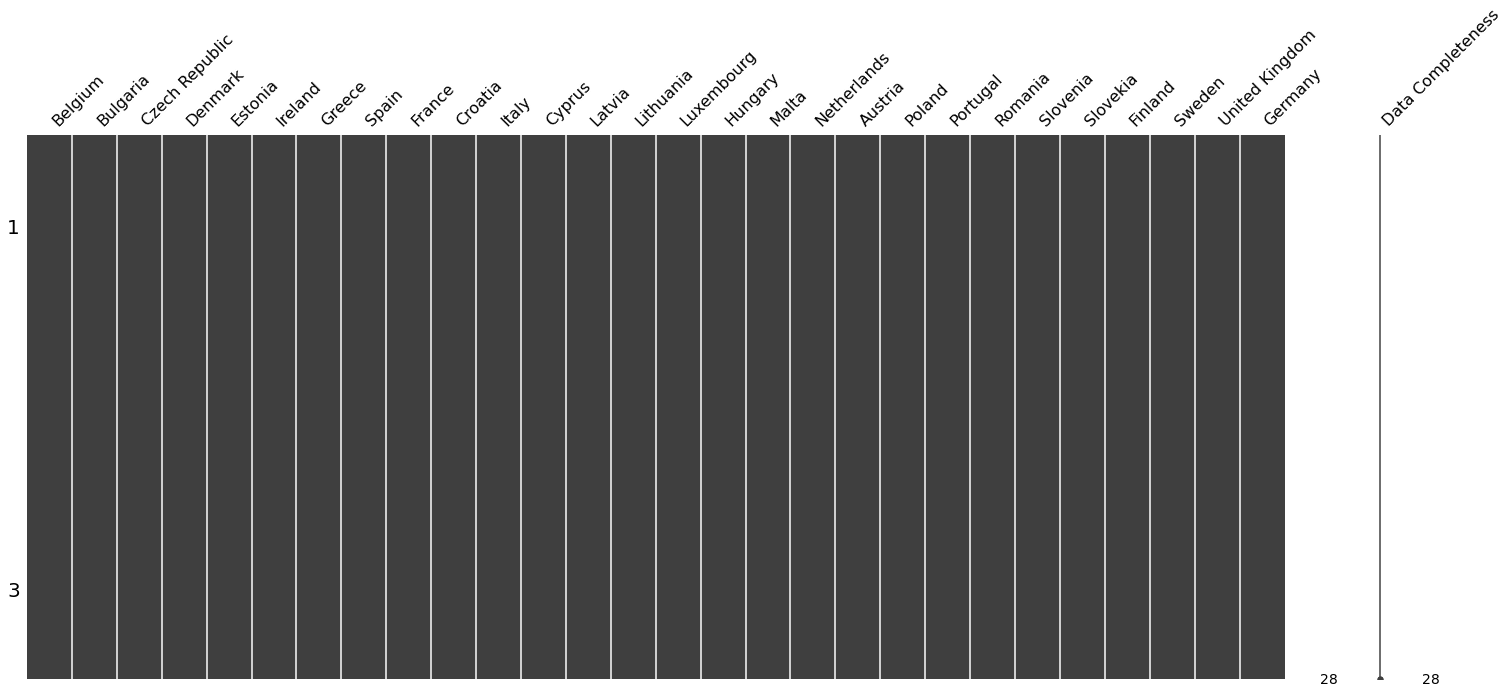

In [25]:
msno.matrix(Question_5_1, labels=True, sort = "ascending");

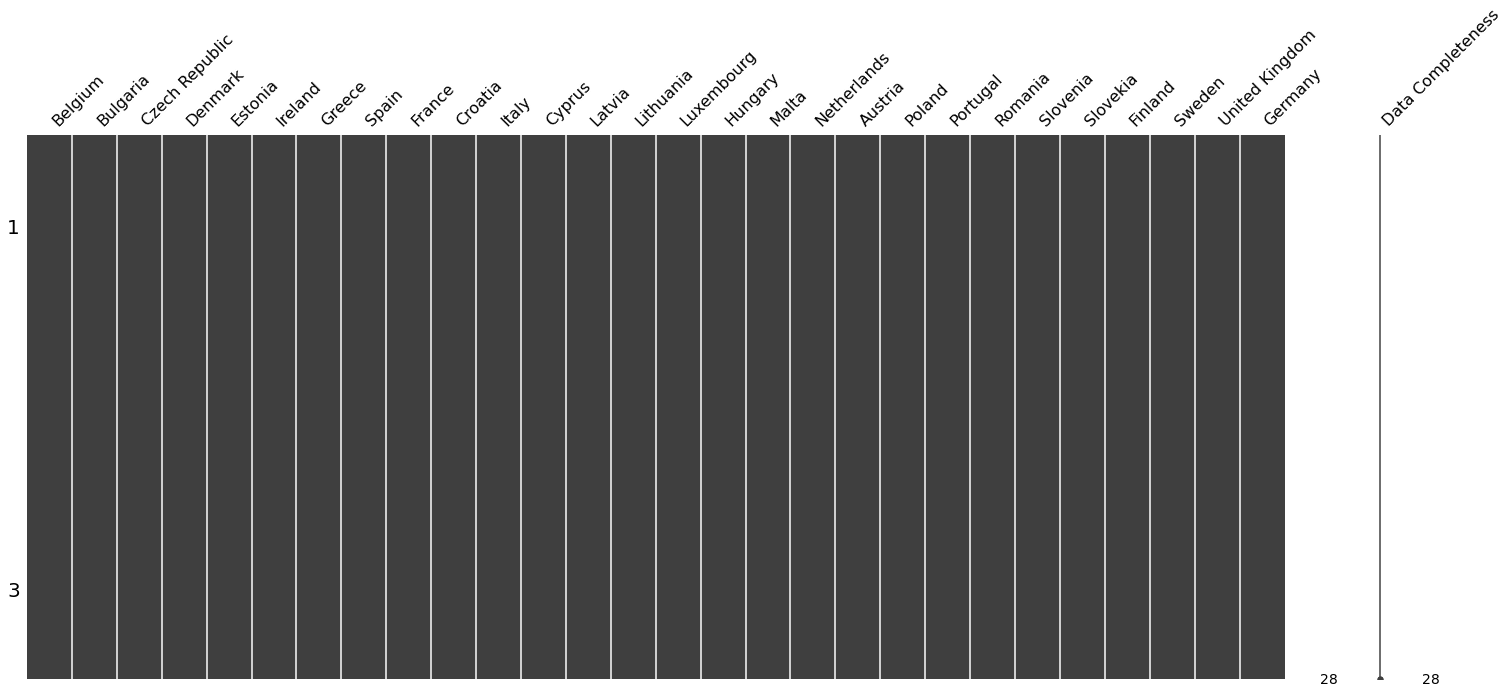

In [26]:
msno.matrix(Question_5_2, labels=True, sort = "ascending");

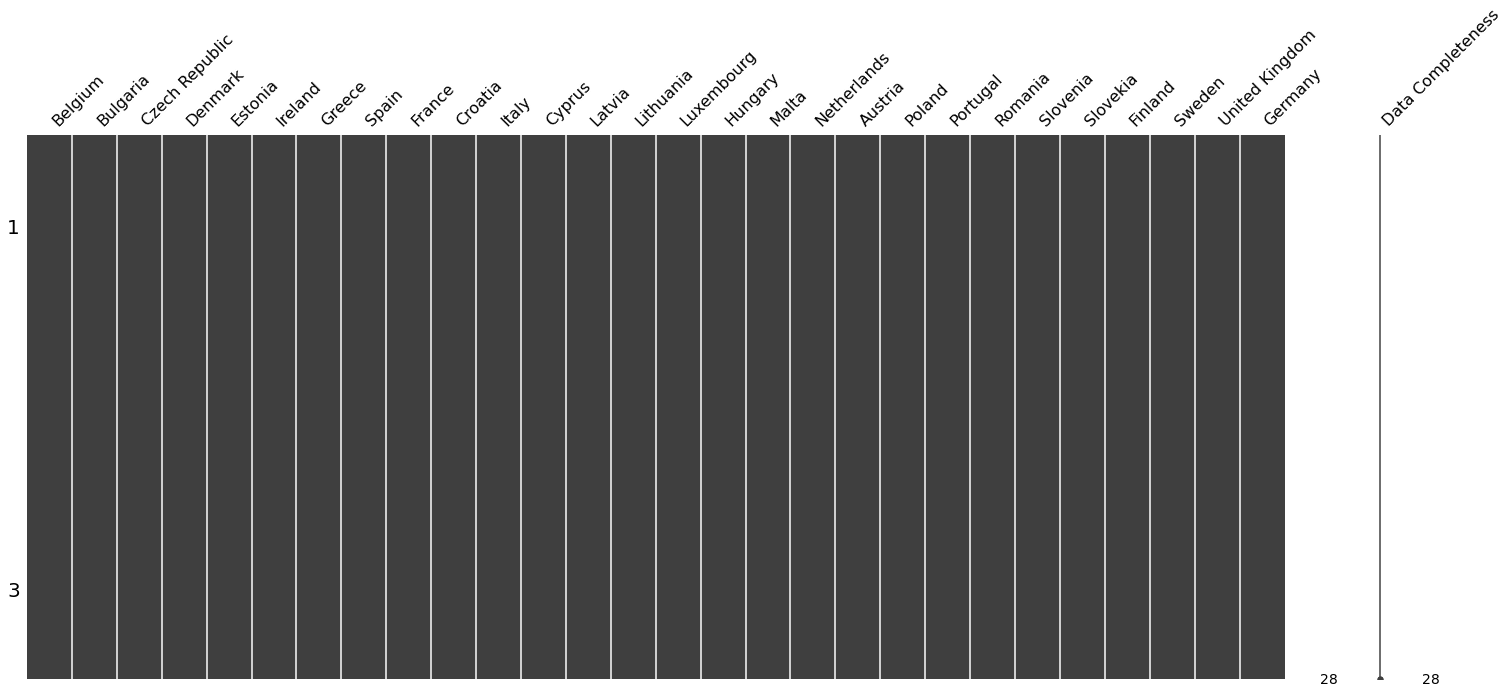

In [27]:
msno.matrix(Question_5_3, labels=True, sort = "ascending");

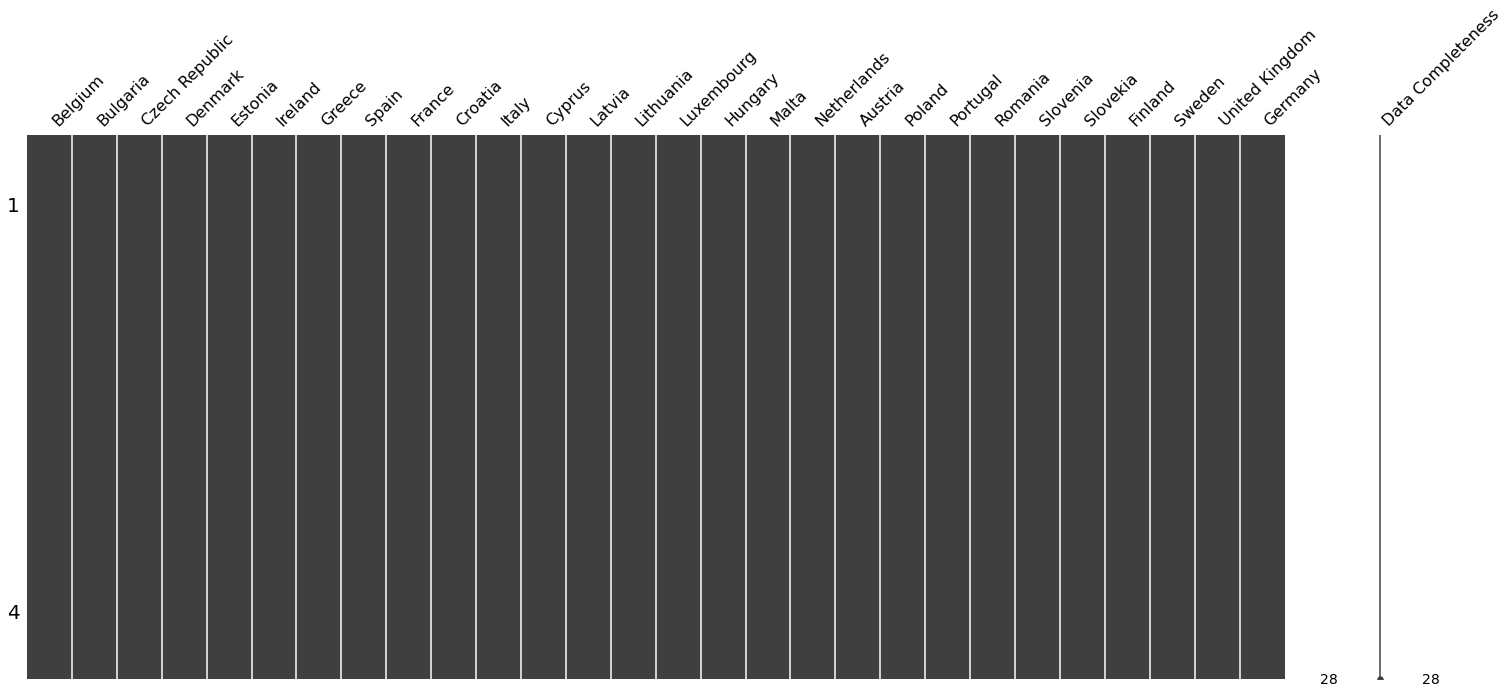

In [28]:
msno.matrix(Question_6, labels=True, sort = "ascending");

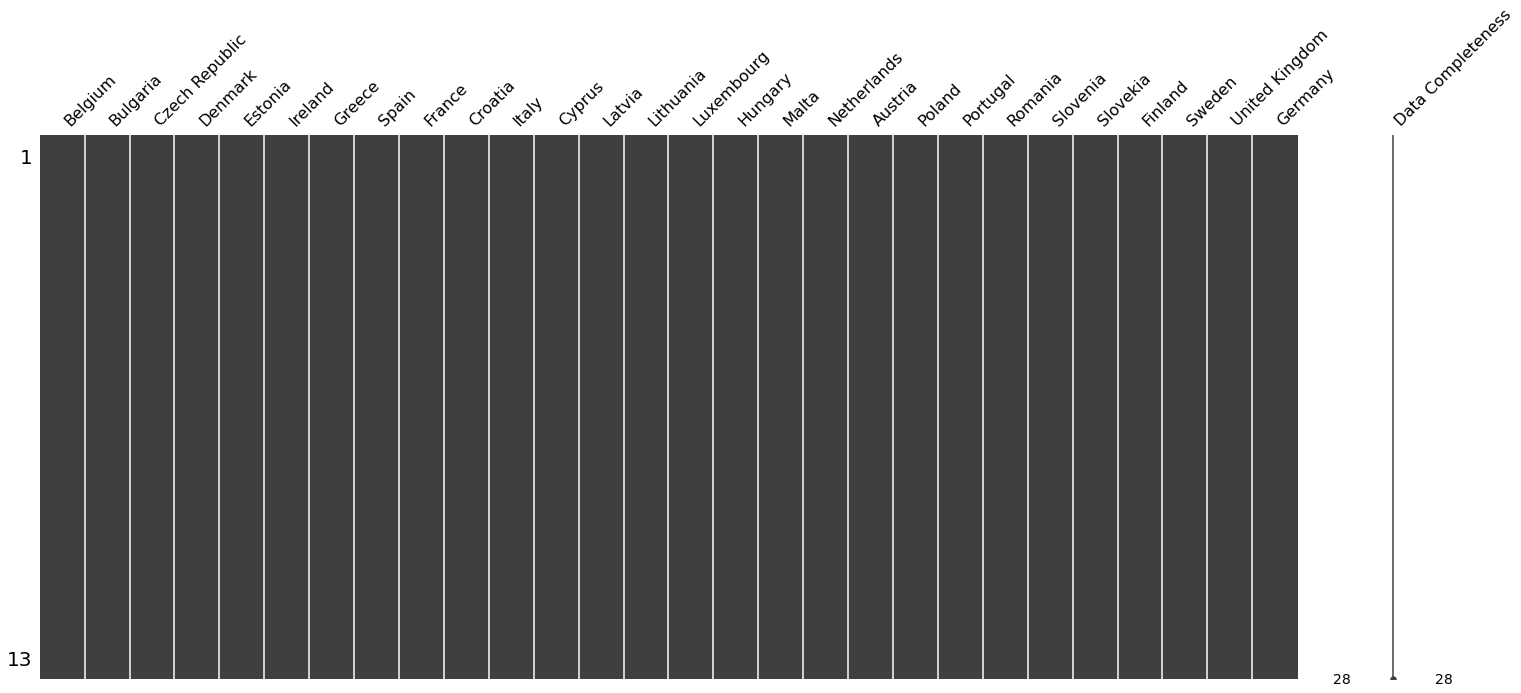

In [29]:
msno.matrix(Question_8, labels=True, sort = "ascending");

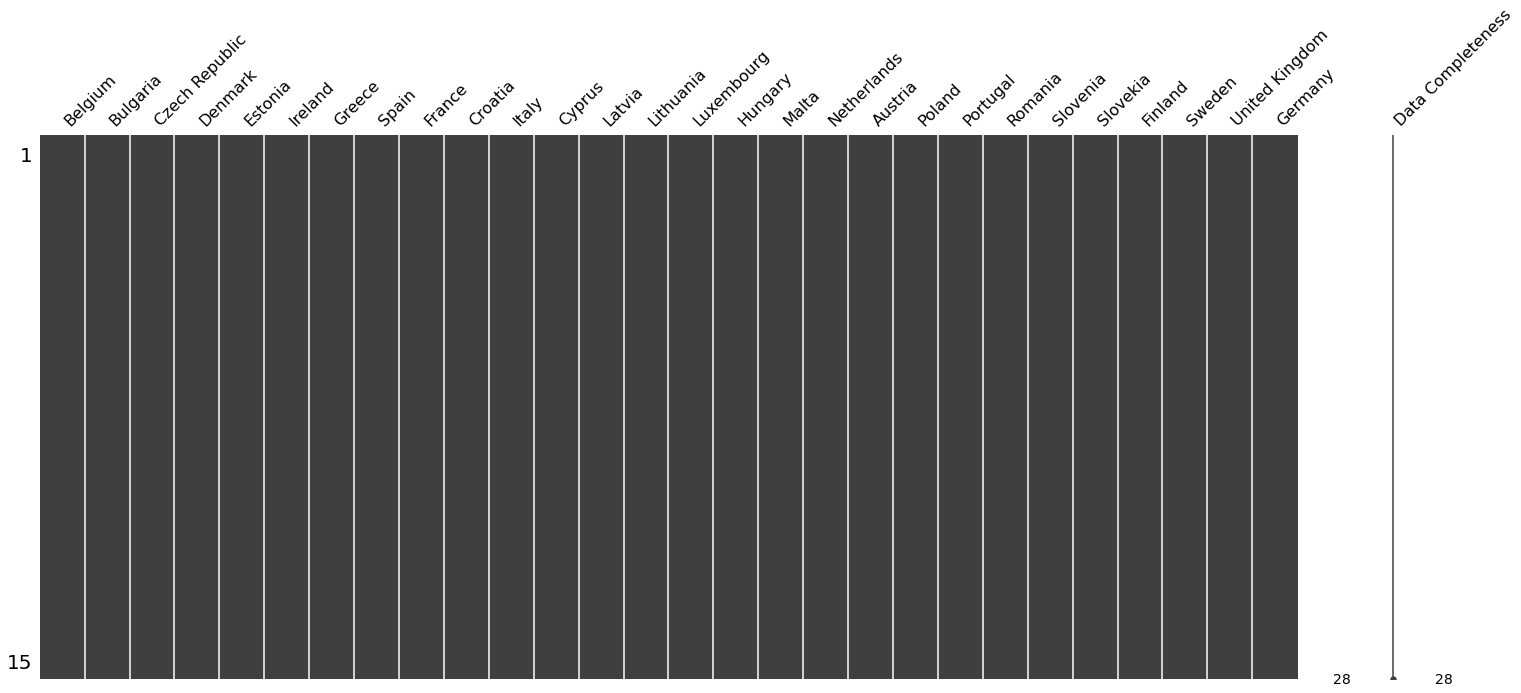

In [30]:
msno.matrix(Question_12, labels=True, sort = "ascending");

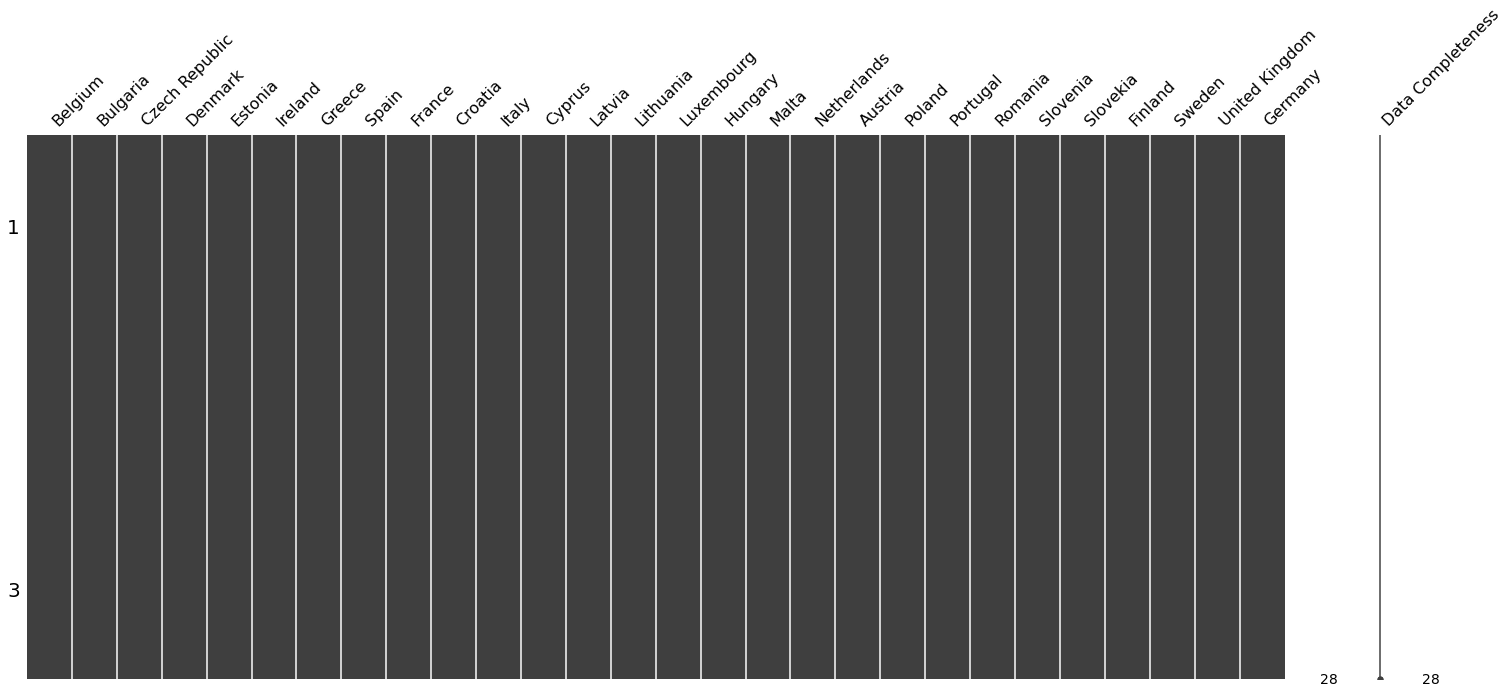

In [31]:
msno.matrix(Question_15, labels=True, sort = "ascending");

Fortunately, none of the dataframes contain missing values. 

In [32]:

Question_1= Question_1.reset_index()

Question_1.head()

,Response,Belgium,Bulgaria,Czech Republic,Denmark,West Germany,East Germany,Eastern Germany,Estonia,Ireland,...,Austria,Poland,Portugal,Romania,Slovenia,Slovekia,Finland,Sweden,United Kingdom,Germany
0,Yes,320,348,250,271,213.0,332,127,310,389,...,288,233,317,280,234,335,254,200,288,672.0
1,No,639,659,642,701,739.0,1102,359,646,576,...,641,716,668,696,758,630,729,807,637,2200.0
2,Refusal,1,0,1,1,5.0,7,1,0,2,...,6,3,1,1,0,0,2,0,2,13.0
3,I dont know,0,12,8,5,9.0,13,2,4,1,...,1,5,4,6,1,15,7,3,4,24.0


In [33]:
Question_1= Question_1.melt(id_vars = "Response", var_name = "Country", value_name = "Number")
Question_1.head()

,Response,Country,Number
0,Yes,Belgium,320
1,No,Belgium,639
2,Refusal,Belgium,1
3,I dont know,Belgium,0
4,Yes,Bulgaria,348


In [35]:
fig, ax =plt.subplots(figsize= (40,10), dpi = 500)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Country", y="Number", hue="Response", data=Question_1)